# slice_max

In [1]:
library('tidyverse')
library('ggrepel')
library('patchwork')
options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
top.hwy = mpg %>% slice_max(hwy, n = 1)

top.hwy

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact


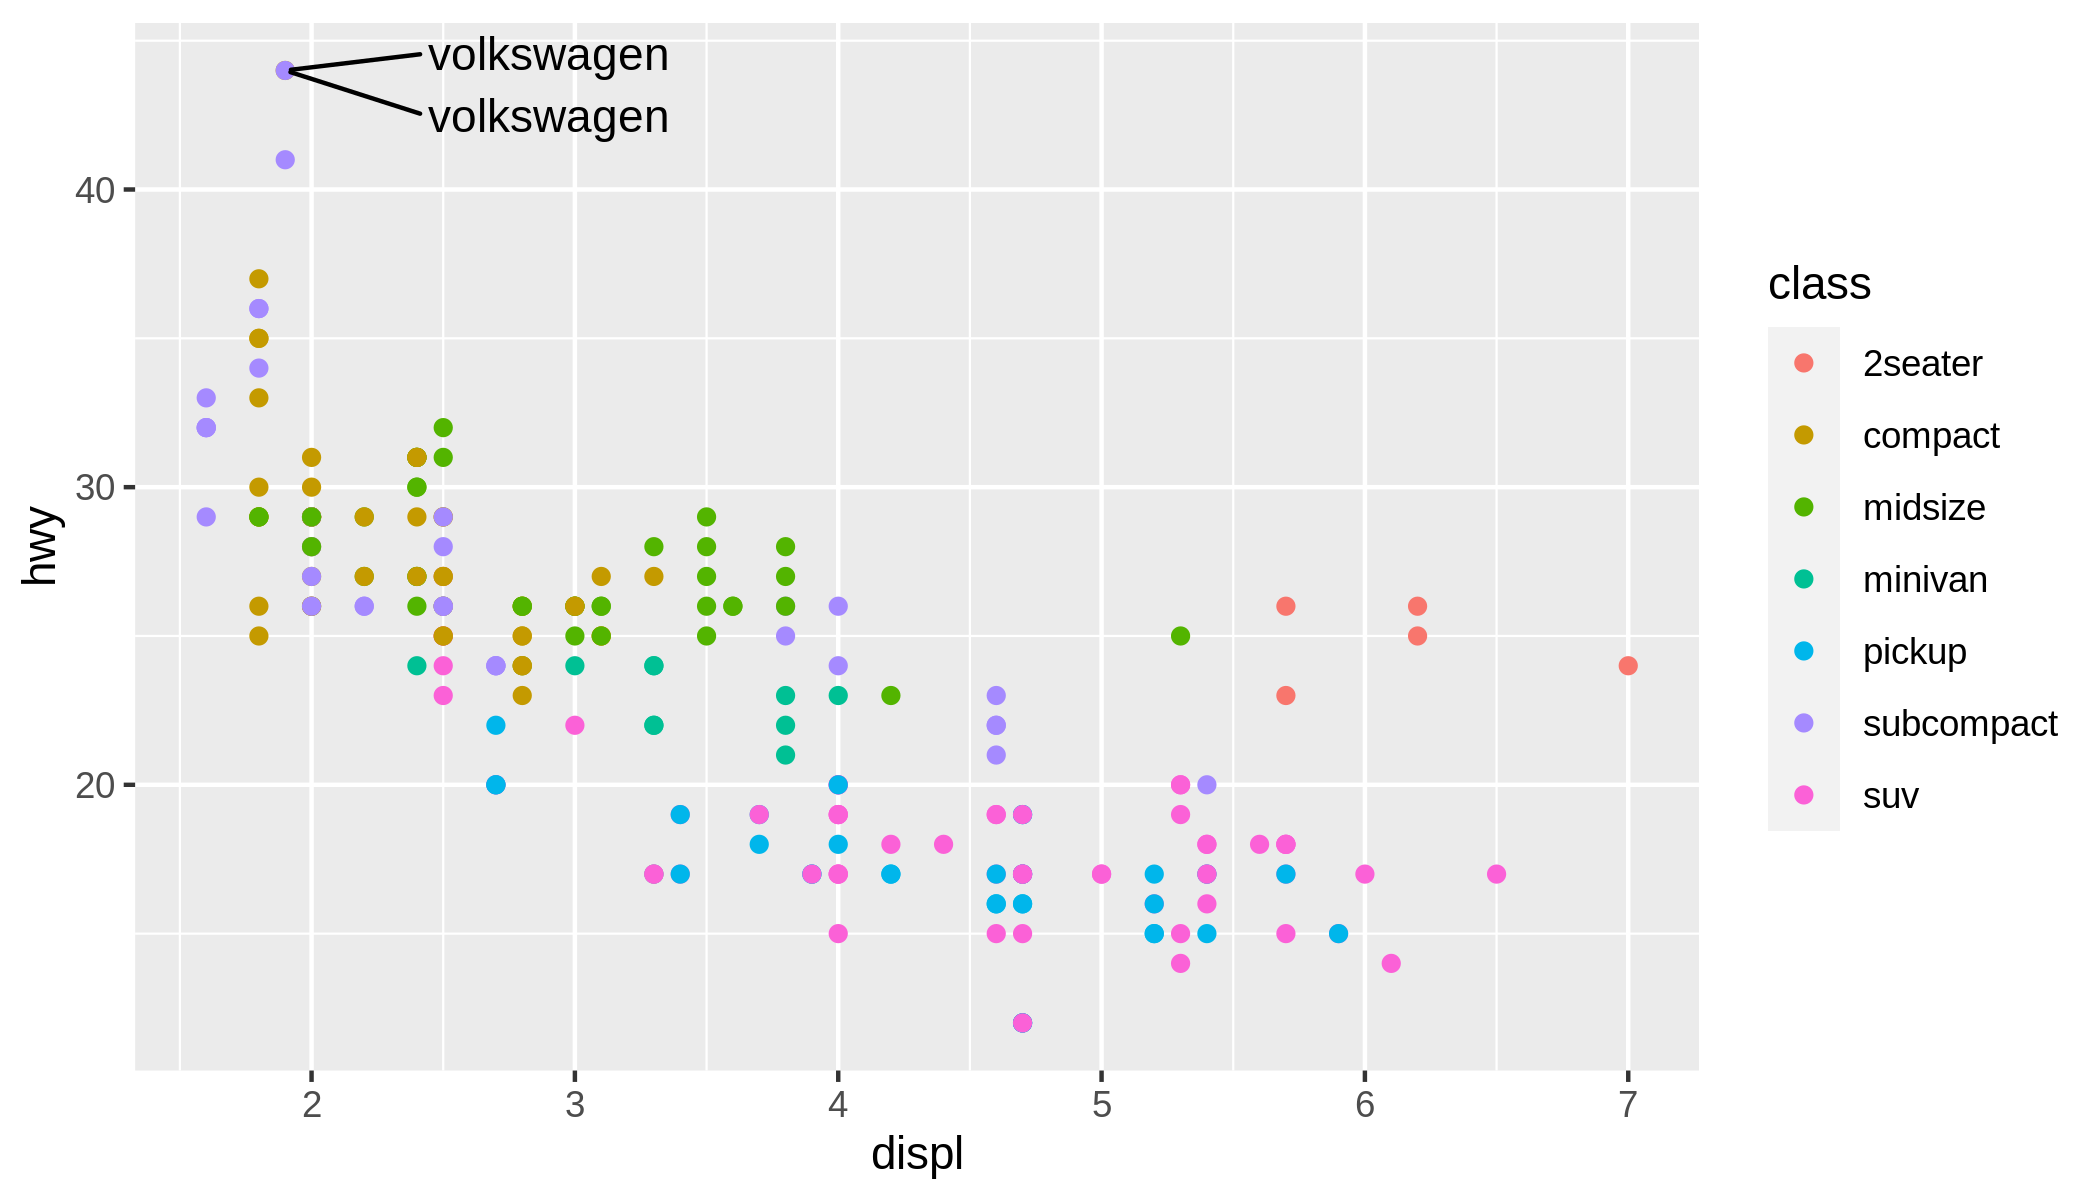

In [3]:
p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')  # this is important

p.hwy = p

p

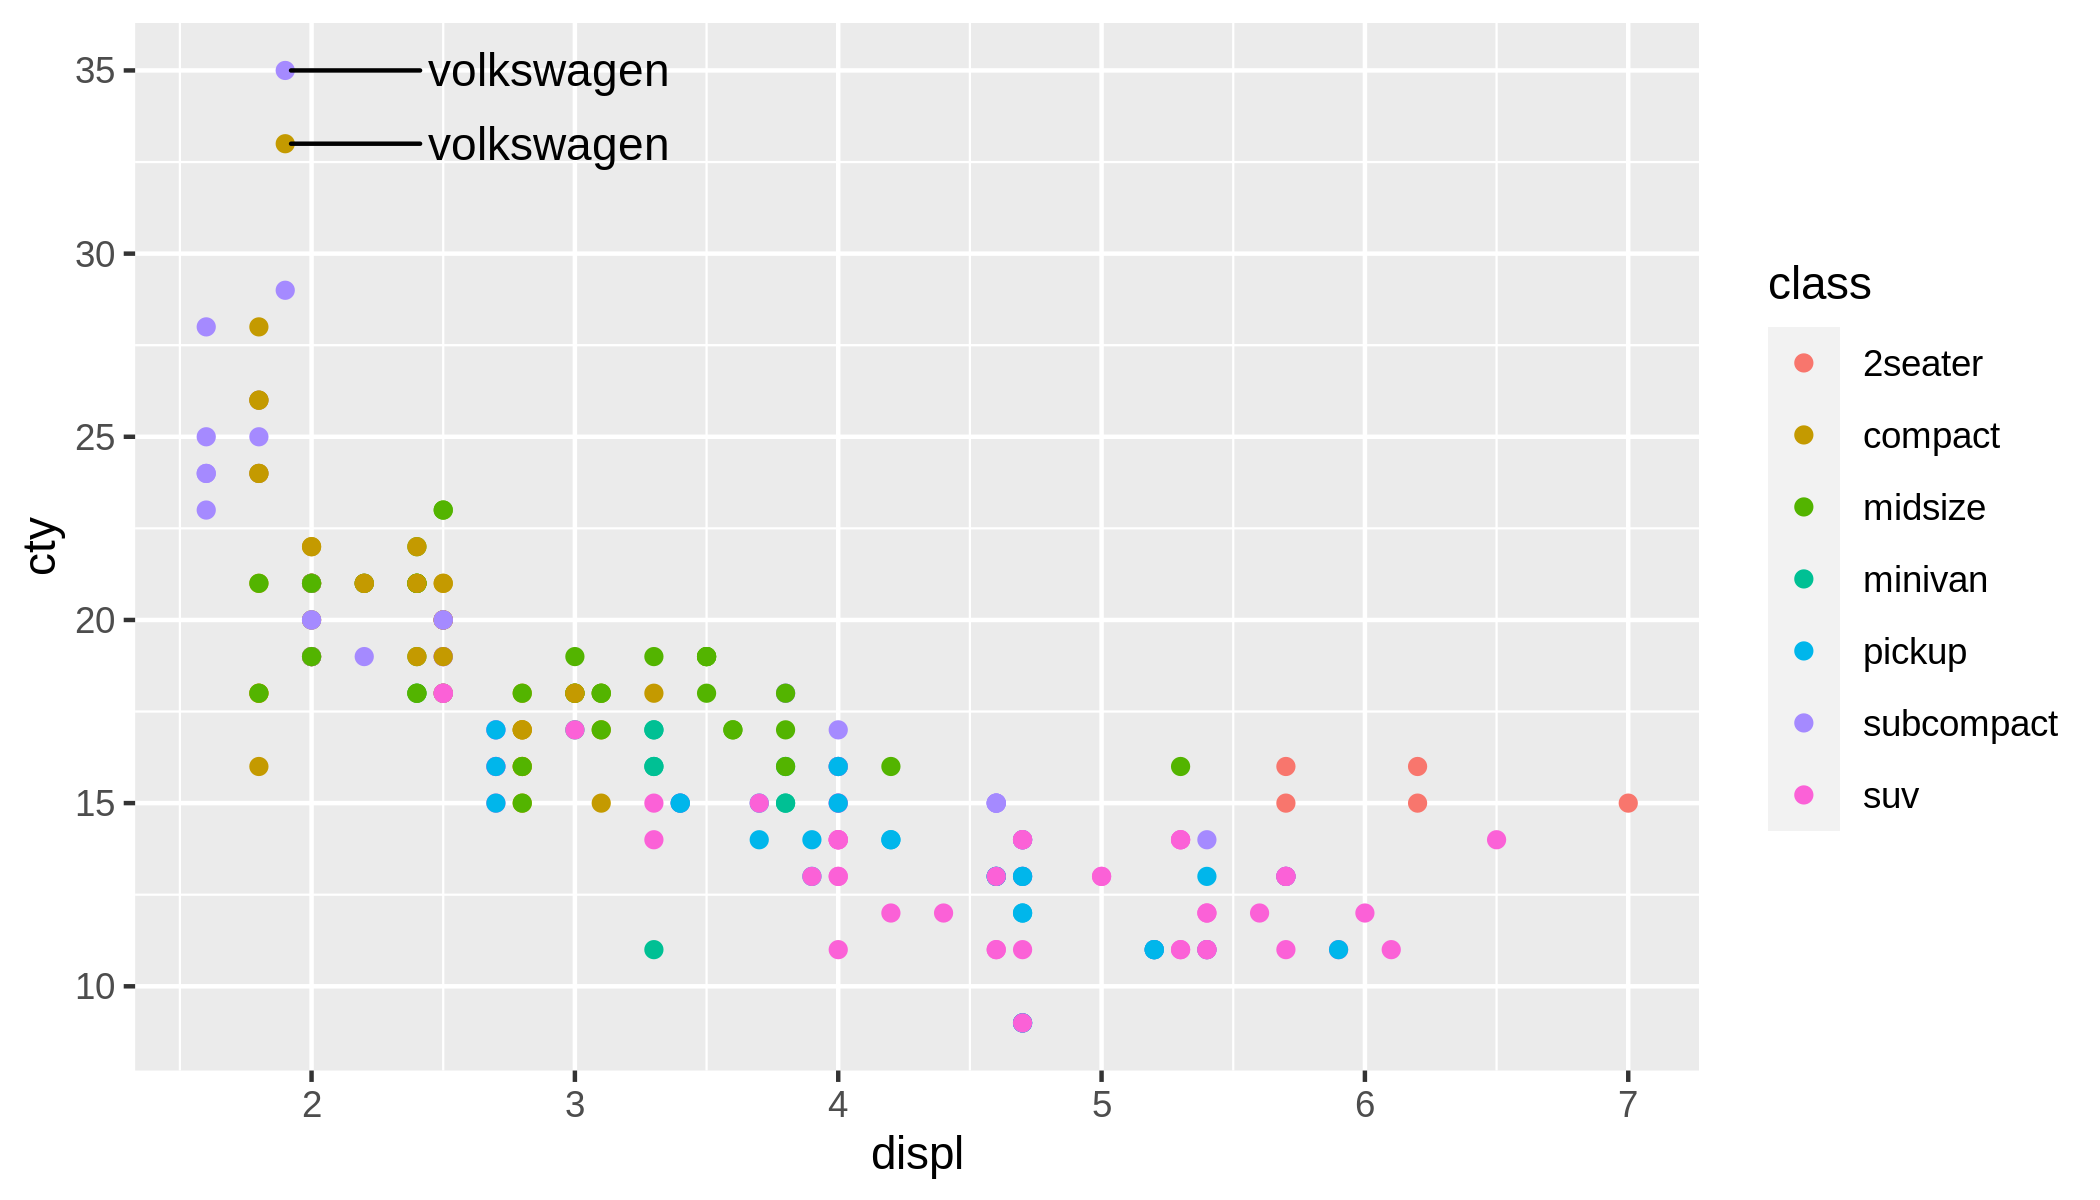

In [4]:
p = ggplot(mpg, aes(x = displ, y = cty, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')

p.cty = p

p

In [5]:
# options(repr.plot.width = 12)
# p.hwy + p.cty

In [6]:
# p.hwy = p.hwy + theme(legend.position = 'none')

# p.hwy + p.cty

In [7]:
# options(repr.plot.width = 10, repr.plot.height = 4)

# p.hwy = p.hwy + ylim(c(0, 45))

# p.cty = p.cty + ylim(c(0, 45))

# p.hwy + p.cty

# Other summary functions

In [8]:
library(nycflights13)

In [9]:
weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


Warning message:
“Removed 1 rows containing missing values (geom_point).”


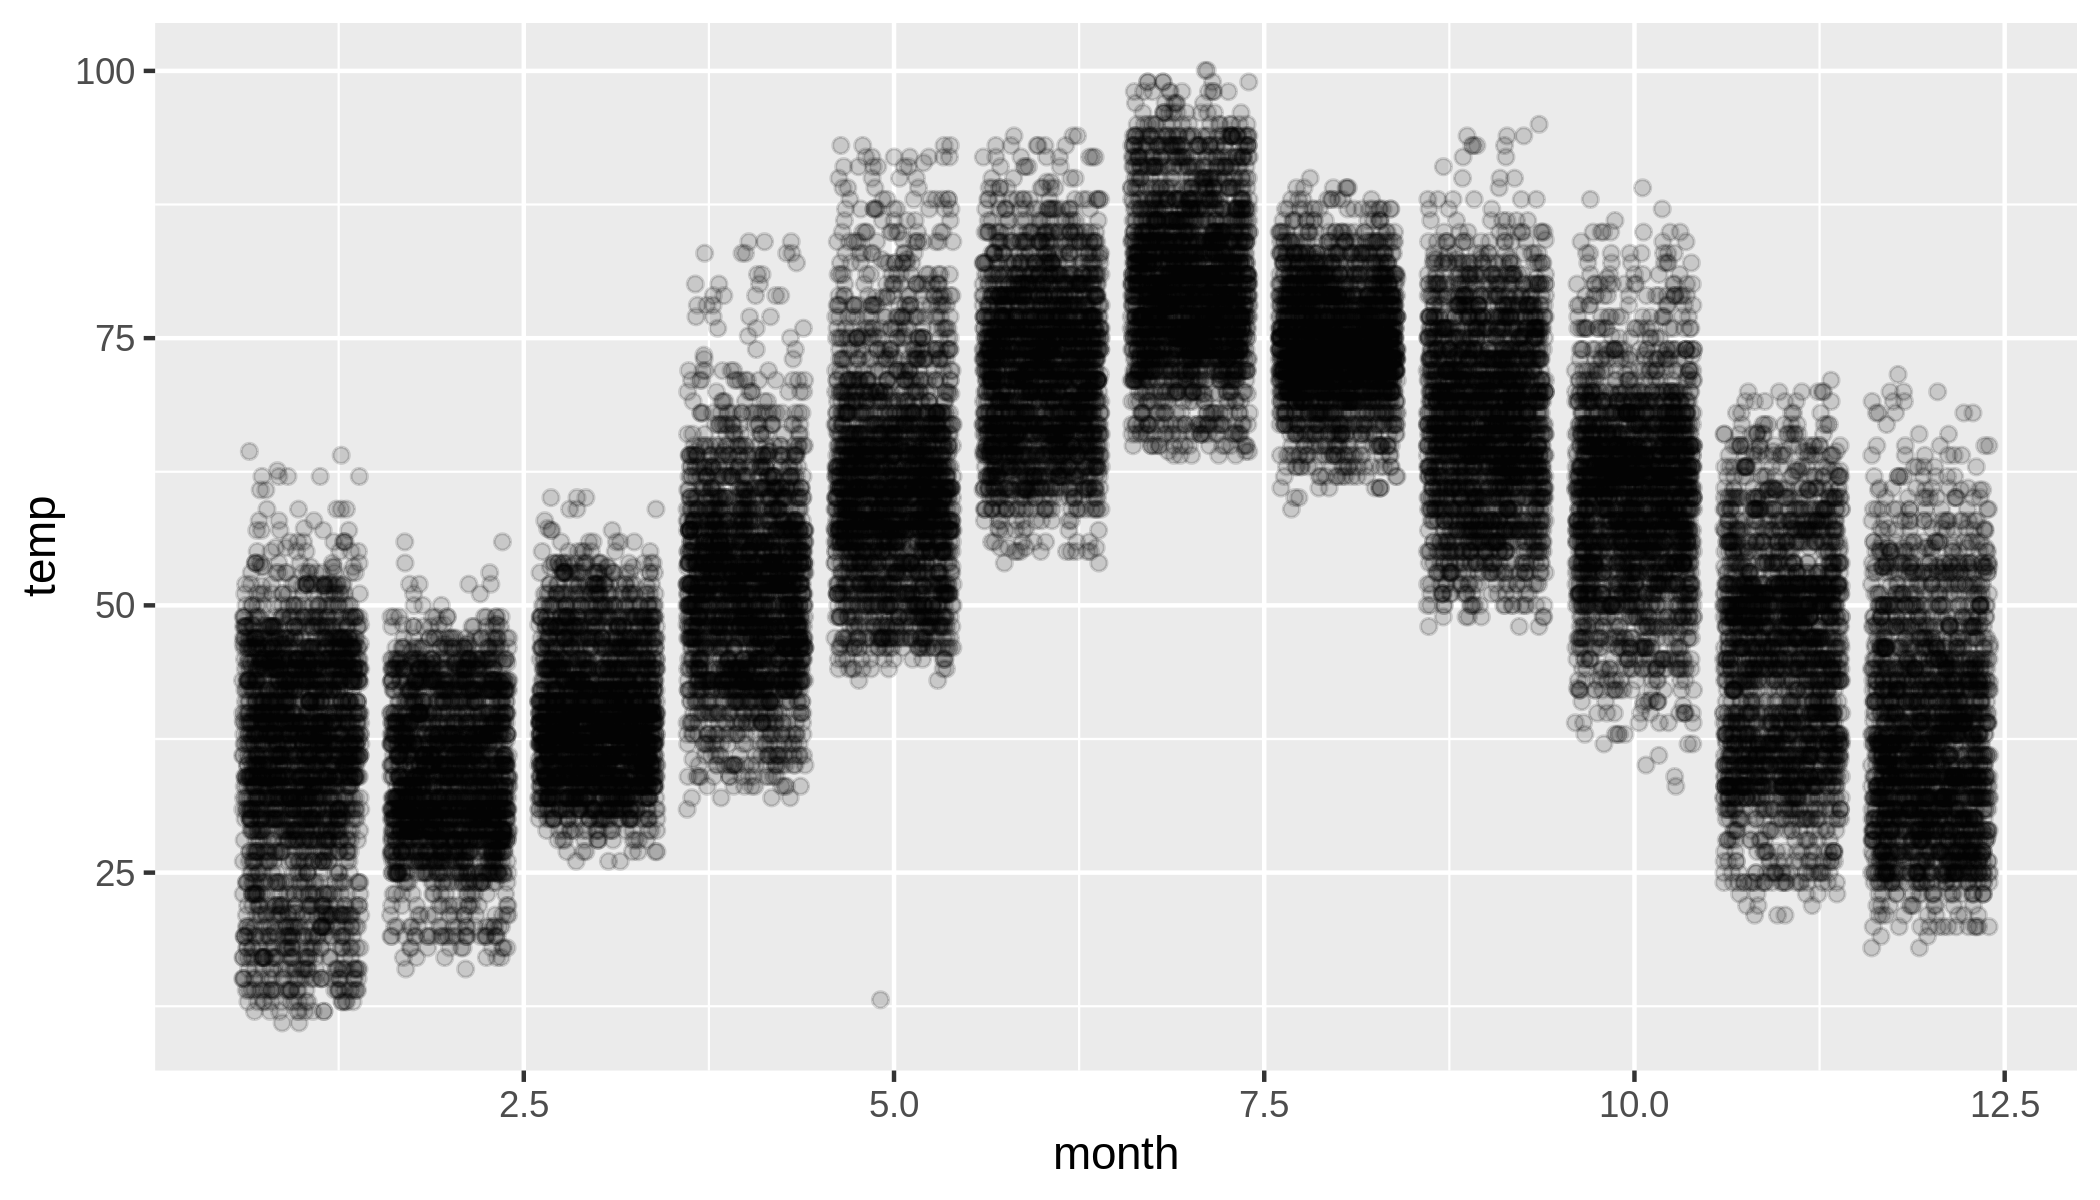

In [10]:
p = ggplot(weather, aes(x = month, y = temp))

p = p + geom_point(alpha = 0.15, 
                   position = position_jitter(h = 0, w = 0.4))

p

## mean, median, max, min

In [11]:
# weather %>%
#     group_by(month) %>%
#     summarize(median.temp = median(temp)) %>%
#     arrange(median.temp)

## sd, IQR

In [12]:
# weather %>%
#     group_by(month) %>%
#     summarize(sd.temp = sd(temp)) %>%
#     arrange(sd.temp)

# Data import/export

## readr

In [13]:
# ?readr

In [14]:
# ?read_csv

In [15]:
# ?write_csv

In [16]:
library('nycflights13')

weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [17]:
weather %>% write_csv('weather.csv')

In [18]:
system("head weather.csv", intern=TRUE)

[1] "origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour"
 [2] "EWR,2013,1,1,1,39.02,26.06,59.37,270,10.357019999999999,NA,0,1012,10,2013-01-01T06:00:00Z"               
 [3] "EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01T07:00:00Z"                        
 [4] "EWR,2013,1,1,3,39.02,28.04,64.43,240,11.5078,NA,0,1012.5,10,2013-01-01T08:00:00Z"                        
 [5] "EWR,2013,1,1,4,39.92,28.04,62.21,250,12.658579999999999,NA,0,1012.2,10,2013-01-01T09:00:00Z"             
 [6] "EWR,2013,1,1,5,39.02,28.04,64.43,260,12.658579999999999,NA,0,1011.9,10,2013-01-01T10:00:00Z"             
 [7] "EWR,2013,1,1,6,37.94,28.04,67.21,240,11.5078,NA,0,1012.4,10,2013-01-01T11:00:00Z"                        
 [8] "EWR,2013,1,1,7,39.02,28.04,64.43,240,14.960139999999999,NA,0,1012.2,10,2013-01-01T12:00:00Z"             
 [9] "EWR,2013,1,1,8,39.92,28.04,62.21,250,10.357019999999999,NA,0,1012.2,10,2013-01-01T13:00:00Z"             
[10] "EWR,2013,1,1,9,39.92,28.04,62.21,260,14.960139999999999,NA,0,1012.7,10,2013-01-01T14:00:00Z"

## Reading data directly from URL

In [19]:
# also works with read.csv

marathon_df = read_csv('https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv')

# marathon_df = read_csv(
#     'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv',
#     col_types = cols()
# )


── Column specification ────────────────────────────────────────────────────────
cols(
  year = col_double(),
  name = col_character(),
  country = col_character(),
  time = col_character(),
  race.time = col_double(),
  MF = col_character(),
  country.simple = col_character()
)




In [20]:
marathon_df %>% head # try with print

year,name,country,time,race.time,MF,country.simple
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States
